# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.4.1 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

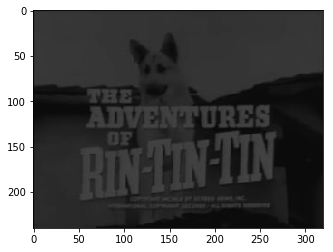

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

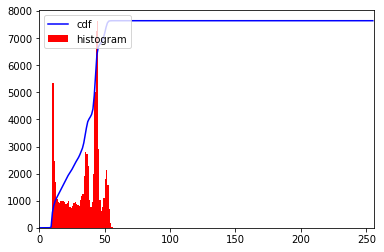

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [8]:
rintin_gray

array([[21, 39, 42, ..., 41, 41, 37],
       [22, 40, 44, ..., 42, 42, 37],
       [23, 41, 45, ..., 42, 43, 38],
       ...,
       [14, 28, 35, ..., 18, 18, 17],
       [16, 29, 36, ..., 18, 17, 17],
       [18, 31, 38, ..., 18, 17, 17]], dtype=uint8)

In [9]:
rintin_gray.shape

(240, 320)

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre `0` e `255`. 
3. Plote a imagem pedida

In [10]:
rintin_gray.max()

58

In [11]:
rintin_gray.min()

8

In [12]:
#saida = np.zeros((240, 320), dtype=np.uint8)
#for i in range(rintin_gray.shape[0]):
 #   for j in range(rintin_gray.shape[1]):
  #      saida[i][j] =( (rintin_gray[i][j]) - 8) * (255/50)


In [13]:
saida = np.zeros((240, 320), dtype=np.uint8)
for i in range(rintin_gray.shape[0]):
    for j in range(rintin_gray.shape[1]):
        saida[i][j] = ((255*(rintin_gray[i][j]-8))/50) + 8

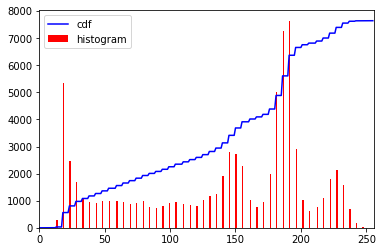

In [14]:
hist,bins = np.histogram(saida.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

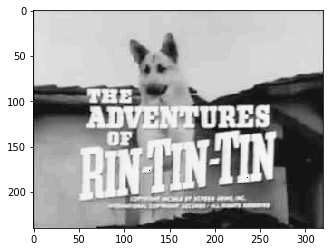

In [15]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [16]:
canto = cv2.imread("cena_canto_sala.jpg")

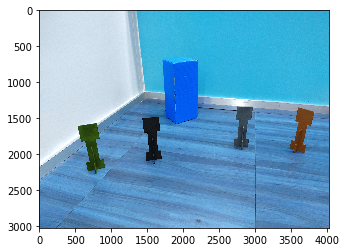

In [17]:
plt.imshow(canto)

In [18]:
cena_canto_sala_rgb = cv2.cvtColor(canto, cv2.COLOR_BGR2RGB)

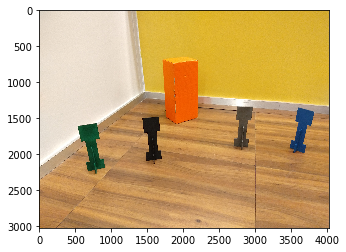

In [19]:
plt.imshow(cena_canto_sala_rgb)

In [20]:
cena_canto_sala_R = cena_canto_sala_rgb[:,:,0]

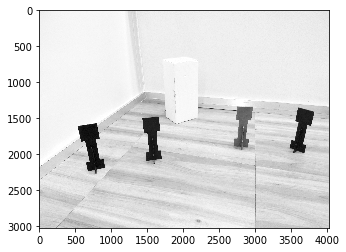

In [21]:
plt.imshow(cena_canto_sala_R, cmap='Greys_r')

In [22]:
cena_canto_sala_R

array([[218, 214, 215, ..., 185, 183, 183],
       [217, 216, 216, ..., 186, 184, 181],
       [215, 215, 216, ..., 188, 185, 183],
       ...,
       [162, 164, 165, ..., 164, 163, 162],
       [160, 163, 167, ..., 160, 157, 159],
       [153, 159, 165, ..., 158, 155, 158]], dtype=uint8)

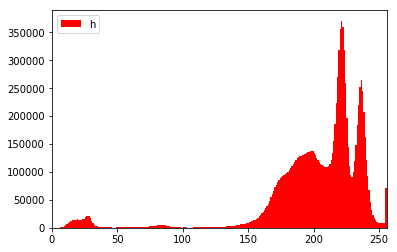

In [23]:
#Plotar histograma

hist,bins = np.histogram(cena_canto_sala_R.flatten(),256,[0,256])


plt.hist(cena_canto_sala_R.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()



In [24]:
# Filtro do vermelho

for i in range(cena_canto_sala_R.shape[0]):
    for j in range(cena_canto_sala_R.shape[1]):
        if cena_canto_sala_R[i][j] > 230:
            cena_canto_sala_R[i][j] = 255
        else:
            cena_canto_sala_R[i][j] = 0

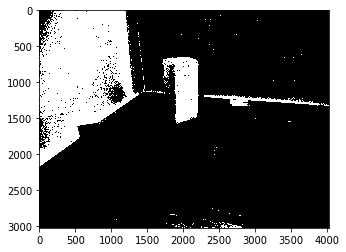

In [25]:
plt.imshow(cena_canto_sala_R, cmap='Greys_r')

In [26]:
cena_canto_sala_B = cena_canto_sala_rgb[:,:,2]

In [27]:
# Filtro Vermelho sem a parede, só a caixa vermelho

cena_canto_sala_B = cena_canto_sala_rgb[:,:,2]

for i in range(cena_canto_sala_R.shape[0]):
    for j in range(cena_canto_sala_R.shape[1]):
        if cena_canto_sala_R[i][j] > 220 and cena_canto_sala_B[i][j] > 150:
            cena_canto_sala_R[i][j] = 0
        elif cena_canto_sala_R[i][j] > 220 and cena_canto_sala_B[i][j] <= 100:
            cena_canto_sala_R[i][j] = 255
        else:
            cena_canto_sala_R[i][j] = 0

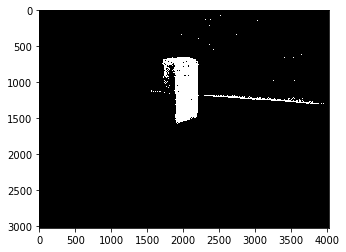

In [28]:
plt.imshow(cena_canto_sala_R, cmap='Greys_r')

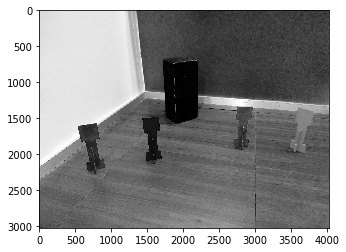

In [29]:
plt.imshow(cena_canto_sala_B, cmap='Greys_r')

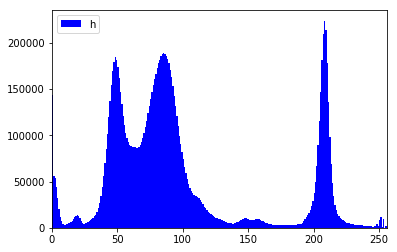

In [30]:
# Plotar histograma

hist,bins = np.histogram(cena_canto_sala_B.flatten(),256,[0,256])


plt.hist(cena_canto_sala_B.flatten(),256,[0,256], color = 'B')
plt.xlim([0,256])
plt.legend(('histogram'), loc = 'upper left')
plt.show()

In [31]:
# Filtro do azul

for i in range(cena_canto_sala_B.shape[0]):
    for j in range(cena_canto_sala_B.shape[1]):
        if cena_canto_sala_B[i][j] > 190:
            cena_canto_sala_B[i][j] = 255
        else:
            cena_canto_sala_B[i][j] = 0

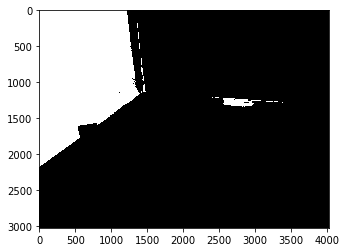

In [32]:
plt.imshow(cena_canto_sala_B, cmap='Greys_r')

In [33]:
#Filtro para ficar só a negócio azul

for i in range(cena_canto_sala_B.shape[0]):
    for j in range(cena_canto_sala_B.shape[1]):
        if cena_canto_sala_R[i][j] > 190 and cena_canto_sala_B[i][j] > 60:
            cena_canto_sala_B[i][j] = 0
        elif cena_canto_sala_R[i][j] < 100 and cena_canto_sala_B[i][j] > 60:
            cena_canto_sala_B[i][j] = 255
        else:
            cena_canto_sala_B[i][j] = 0

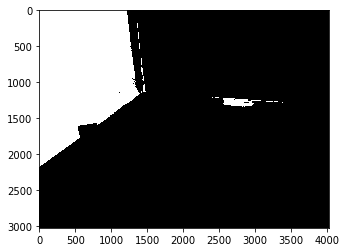

In [34]:
plt.imshow(cena_canto_sala_B, cmap='Greys_r')

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

In [35]:
box = cv2.imread('hall_box_battery_atividade3.png')

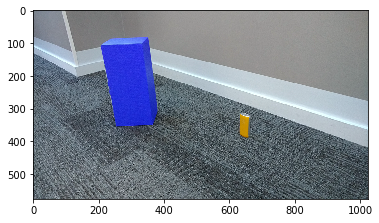

In [36]:
plt.imshow(box)

In [37]:
box_rgb = cv2.cvtColor(box, cv2.COLOR_BGR2RGB)

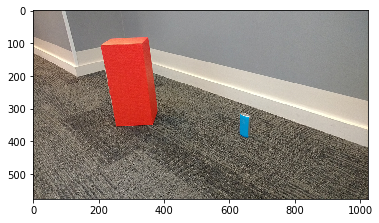

In [38]:
plt.imshow(box_rgb)

In [39]:
#from math import fabs
#cinza = box_rgb
#print (len(cinza[i]))

In [40]:
#for i in range(box_rgb.shape[0]):
    #for j in range(box_rgb.shape[1]):
        #if j == 0 or j ==1024:
            #cinza[i][j] = cinza [i][j]
        #else:
            #cinza[i][j] =  (cinza[i][j+1] - cinza[i][j-1])

In [41]:
box_cinza = cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)

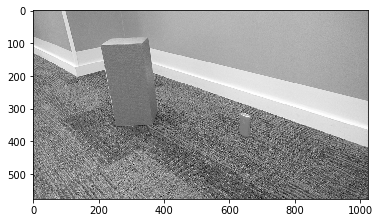

In [42]:
plt.imshow(box_cinza, cmap="Greys_r", vmin=0, vmax=255)

In [43]:
box_cinza

array([[122, 133, 127, ..., 129, 130, 129],
       [129, 127, 129, ..., 134, 126, 128],
       [132, 127, 124, ..., 128, 133, 130],
       ...,
       [ 90, 126, 141, ...,  72,  74,  56],
       [ 93, 123, 127, ...,  59,  53,  39],
       [ 91,  76,  82, ...,  33,  51,  61]], dtype=uint8)

In [44]:
box_cinza.shape


(576, 1024)

In [45]:
cinza = box_cinza.copy()

In [46]:
cinza[:] = 0

In [47]:
from math import fabs



In [48]:
cinza = box_cinza #np.zeros((576, 1024), dtype=np.uint8)
for i in range(box_cinza.shape[0]):
    for j in range(box_cinza.shape[1]):
        if j == 0 or j == 1023:
            cinza[i][j] = cinza [i][j]
        else:
            cinza[i][j] =  fabs(cinza[i][j+1] - cinza[i][j-1])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in ubyte_scalars
  import sys


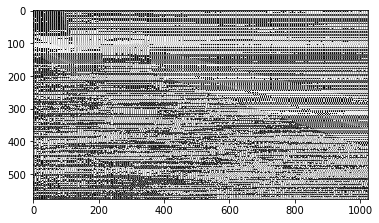

In [49]:
plt.imshow(cinza, cmap="Greys_r", vmin=0, vmax=255)